In [246]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from matplotlib import cm
import scipy.stats as stats

In [198]:
data = pd.read_csv('data.csv')
data

,srcbb_name,Name,Class,Ht,Wt,Immediately Eligible,January Eligible,Season,School,Conf,...,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,ORtg,DRtg,3PT Rating
0,kani-acree,Kani Acree,RS SO,78,185,NaN,NaN,2021-22,Ball State,MAC,...,0.0,0.1,0.1,0.042,-2.0,-0.6,-2.6,95.5,109.5,-0.402065
1,kim-aikenjr,"Kim Aiken, Jr.",RS JR,79,215,Yes,NaN,2021-22,Arizona,Pac-12,...,0.4,0.2,0.6,0.259,6.5,6.4,12.9,139.0,88.7,0.404750
2,dominique-alexander,Dominique Alexander,SR,70,160,NaN,NaN,2021-22,Chicago State,WAC,...,0.5,0.2,0.8,0.054,-1.6,-1.0,-2.6,100.7,111.8,-1.466488
3,junior-ballard,Junior Ballard,JR,75,185,Yes,NaN,2021-22,Fresno State,MWC,...,0.6,0.7,1.3,0.122,-0.3,2.2,1.8,109.5,98.3,-1.147110
4,timothy-barnes,Timothy Barnes,FR,75,180,NaN,NaN,2021-22,Kansas City,Summit,...,0.6,0.5,1.0,0.156,-1.6,0.6,-1.0,119.5,97.1,-2.494039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,alec-woodard,Alec Woodard,SO,74,200,Yes,NaN,2021-22,Austin Peay,OVC,...,0.4,0.6,1.0,0.081,-3.1,0.3,-2.8,100.9,103.4,-1.610255
133,michael-wynn,Michael Wynn,JR,78,210,NaN,NaN,2021-22,Akron,MAC,...,0.2,0.5,0.7,0.121,-3.7,3.3,-0.4,101.6,93.3,-2.300300
134,brandon-younger,Brandon Younger,JR,79,190,NaN,NaN,2021-22,Presbyterian,Big South,...,0.6,1.0,1.6,0.100,-2.3,0.5,-1.8,102.0,99.0,-1.941338
135,levelle-zeigler,Levelle Zeigler,JR,73,175,NaN,NaN,2020-21,Chicago State,WAC,...,0.0,-0.3,-0.3,-0.060,-2.7,-6.3,-9.0,89.0,129.9,-0.570394


In [204]:
#custom defensive stat to balance player and team defense
data['DTrue'] = .5*stats.zscore(data['DRtg'], nan_policy='omit') + .5*stats.zscore(data['DWS'], nan_policy='omit')

In [201]:
data['total_z'] = Dtrue + stats.zscore(data['SOS']) + stats.zscore(data['Ht']) + stats.zscore(data['3PT Rating'])
top = data.sort_values('total_z', ascending=False).head(5)
top

,srcbb_name,Name,Class,Ht,Wt,Immediately Eligible,January Eligible,Season,School,Conf,...,DWS,WS,WS/40,OBPM,DBPM,BPM,ORtg,DRtg,3PT Rating,total_z
47,pj-horne,P.J. Horne,SR,78,230,Yes,NaN,2020-21,Georgia,SEC,...,0.5,2.0,0.110,3.2,0.5,3.6,127.1,108.5,-1.229156,4.311601
1,kim-aikenjr,"Kim Aiken, Jr.",RS JR,79,215,Yes,NaN,2021-22,Arizona,Pac-12,...,0.2,0.6,0.259,6.5,6.4,12.9,139.0,88.7,0.404750,4.012811
86,sebastian-mendoza,Sebastian Mendoza,FR,75,195,NaN,NaN,2021-22,San Jose State,MWC,...,0.0,0.0,0.069,-20.1,-4.5,-24.5,93.7,103.0,1.512294,3.833845
23,peyton-daniels,Peyton Daniels,FR,74,175,NaN,NaN,2021-22,Vanderbilt,SEC,...,0.1,0.0,-0.037,-5.9,-0.6,-6.5,68.1,99.0,0.662896,3.651668
32,mikey-frazier,Mikey Frazier,RS SO,82,250,NaN,NaN,2020-21,Dixie State,WAC,...,0.0,0.1,0.075,4.7,-0.8,3.9,103.1,107.6,0.670276,3.614123


<IPython.core.display.Javascript object>


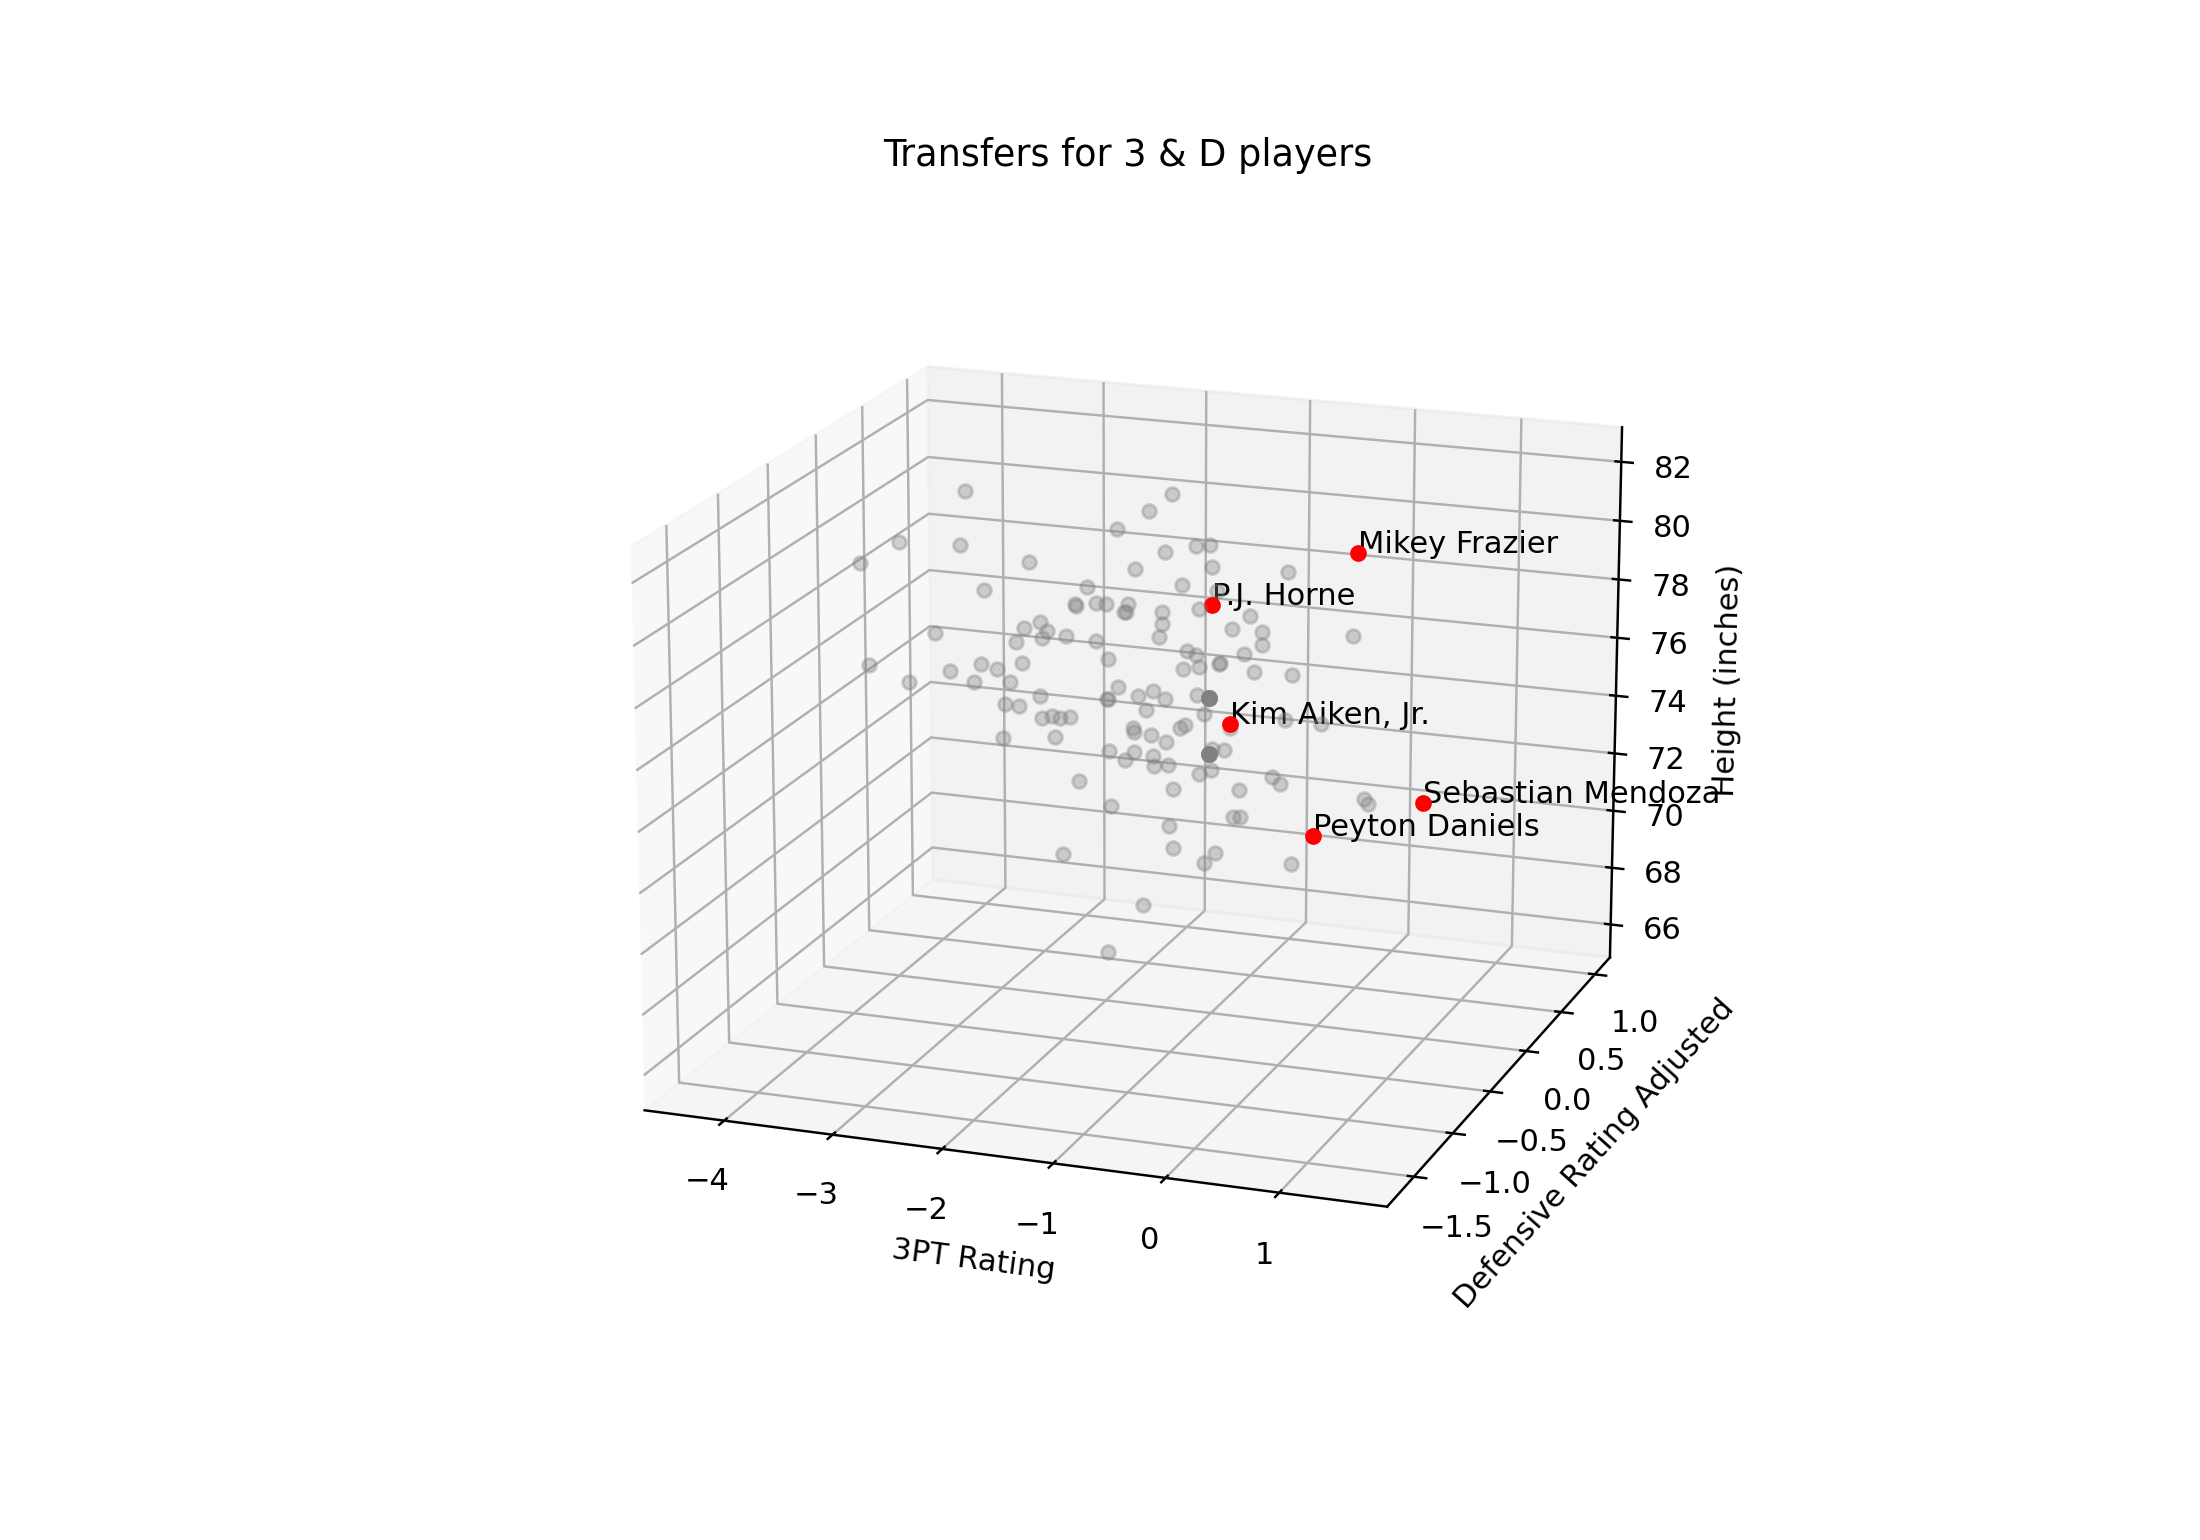

In [253]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

for i in range(len(data)):
    x, y, z = data.iloc[i]['3PT Rating'], data.iloc[i]['DTrue'], data.iloc[i]['Ht']
    
    if data.iloc[i]['Name'] in top["Name"].to_string():
        ax.scatter(x, y, z, color='red')
        ax.text(x, y, z, '{0}'.format(data.iloc[i]['Name']), size=10)
    else:
        ax.scatter(x, y, z, color='gray', alpha=.35)

ax.set_title("Transfers for 3 & D players")

ax.set_xlabel('3PT Rating')
ax.set_ylabel('Defensive Rating Adjusted')
ax.set_zlabel('Height (inches)')
plt.show()
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)